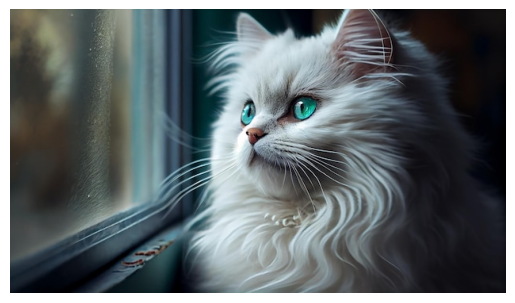

preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/58.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/91.3M [00:00<?, ?B/s]

Persian cat


In [1]:
from transformers import AutoImageProcessor, Dinov2ForImageClassification
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL of the image
image_url = "https://img.freepik.com/free-photo/cute-domestic-kitten-sits-window-staring-outside-generative-ai_188544-12519.jpg?size=626&ext=jpg&ga=GA1.1.2008272138.1721606400&semt=ais_user"

# Download the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

# Load the processor and model
image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")
model = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")

# Preprocess the image
inputs = image_processor(image, return_tensors="pt")

# Predict the class
with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

In [2]:
import requests
from PIL import Image
def download_sample_image() -> Image.Image:
    """Download chest X-ray with CC license."""
    base_url = "https://upload.wikimedia.org/wikipedia/commons"
    image_url = f"{base_url}/2/20/Chest_X-ray_in_influenza_and_Haemophilus_influenzae.jpg"
    headers = {"User-Agent": "RAD-DINO"}
    response = requests.get(image_url, headers=headers, stream=True)
    return Image.open(response.raw)

In [3]:
import torch
from transformers import AutoModel
from transformers import AutoImageProcessor
# Download the model
repo = "microsoft/rad-dino"
model = AutoModel.from_pretrained(repo)
# The processor takes a PIL image, performs resizing, center-cropping, and
# intensity normalization using stats from MIMIC-CXR, and returns a
# dictionary with a PyTorch tensor ready for the encoder
processor = AutoImageProcessor.from_pretrained(repo)
# Download and preprocess a chest X-ray
image = download_sample_image()
image.size  # (width, height)
inputs = processor(images=image, return_tensors="pt")
# Encode the image!
with torch.inference_mode():
    outputs = model(**inputs)
# Look at the CLS embeddings
cls_embeddings = outputs.pooler_output
cls_embeddings.shape  # (batch_size, num_channels)

config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/756 [00:00<?, ?B/s]

torch.Size([1, 768])

In [14]:
inputs.pixel_values.shape

torch.Size([1, 3, 518, 518])

In [10]:
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [11]:
outputs.last_hidden_state.shape

torch.Size([1, 1370, 768])

In [12]:
outputs.last_hidden_state.shape[1] ** (1/2)

37.013511046643494

In [18]:
fake_pixel_values = torch.rand(1, 3, 416, 416)
with torch.inference_mode():
    outputs = model(fake_pixel_values)

In [19]:
(outputs.last_hidden_state.shape[1] - 1) ** (1/2)

29.0

In [20]:
outputs.last_hidden_state.shape

torch.Size([1, 842, 768])